In [34]:
import requests
import json
from rdkit import Chem

def smiles_to_formula(smiles):
    molecule = Chem.MolFromSmiles(smiles)
    return Chem.rdMolDescriptors.CalcMolFormula(molecule)


# 获取pubchem的分子属性
def __get_compound_properties(query, query_type='formula'):
    if query_type.lower() == 'formula':
        url = f"https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/fastformula/{query}/JSON"
    elif query_type.lower() == 'smiles':
        url = f"https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/smiles/{query}/JSON"
    else:
        print(f"Invalid query type: {query_type}. Please choose 'formula' or 'smiles'.")
        return None

    response = requests.get(url)

    if response.status_code == 200:
        data = response.json()
        return data
    else:
        return None

def _get_compound_properties(query, query_type='formula'):
    data = __get_compound_properties(query, query_type)
    if data is  None:
        return None
    props = []
    for mole in data['PC_Compounds']:
        prop_dict = {}
        print(mole['id'])
        if mole['id'].get('id') is not None:
            prop_dict['cid'] = mole['id']['id']['cid']
        for prop in data['PC_Compounds'][0]['props']:
            prop_dict[prop['urn']['label']] = prop['value']
        props.append(prop_dict)
    return props
    
#支持的prop_type:
# Compound
# Compound Complexity
# Count
# Fingerprint
# IUPAC Name
# InChI
# InChIKey
# Log P
# Mass
# Molecular Formula
# Molecular Weight
# SMILES
# Topological
# Weight
def get_compound_properties(query, query_type='formula',prop_type='Molecular Weight'):
    props = _get_compound_properties(query, query_type)
    if props is None:
        return "No data found."
    if prop_type == "ALL":
        return props
    return_props = []
    for mole in props:
        prop_dicts = {}
        for i in mole:
            if i == prop_type:
                prop_dicts[i] = mole[i]
        return_props.append(prop_dicts)
    return return_props
    





In [19]:
for i in  ["Compound", "Compound Complexity", "Count", "Fingerprint", "IUPAC Name", "InChI", "InChIKey", "Log P", "Mass", "Molecular Formula", "Molecular Weight", "SMILES", "Topological", "Weight", "ALL"]:
    query = "C9H8O4" 
    query_type = "formula"  # Change this to "smiles" if you have a SMILES string
    data = get_compound_properties(query, query_type,i)
    print(data)

[{'Compound': {'ival': 1}}, {'Compound': {'ival': 1}}, {'Compound': {'ival': 1}}, {'Compound': {'ival': 1}}, {'Compound': {'ival': 1}}, {'Compound': {'ival': 1}}, {'Compound': {'ival': 1}}, {'Compound': {'ival': 1}}, {'Compound': {'ival': 1}}, {'Compound': {'ival': 1}}, {'Compound': {'ival': 1}}, {'Compound': {'ival': 1}}, {'Compound': {'ival': 1}}, {'Compound': {'ival': 1}}, {'Compound': {'ival': 1}}, {'Compound': {'ival': 1}}, {'Compound': {'ival': 1}}, {'Compound': {'ival': 1}}, {'Compound': {'ival': 1}}, {'Compound': {'ival': 1}}, {'Compound': {'ival': 1}}, {'Compound': {'ival': 1}}, {'Compound': {'ival': 1}}, {'Compound': {'ival': 1}}, {'Compound': {'ival': 1}}, {'Compound': {'ival': 1}}, {'Compound': {'ival': 1}}, {'Compound': {'ival': 1}}, {'Compound': {'ival': 1}}, {'Compound': {'ival': 1}}, {'Compound': {'ival': 1}}, {'Compound': {'ival': 1}}, {'Compound': {'ival': 1}}, {'Compound': {'ival': 1}}, {'Compound': {'ival': 1}}, {'Compound': {'ival': 1}}, {'Compound': {'ival': 1}}, 

KeyboardInterrupt: 

In [36]:
query = "CC1CC(C)(C)OC1C(=O)O" 
query_type = "smiles"  # Change this to "smiles" if you have a SMILES string
data = _get_compound_properties(query, query_type)
print(data)

{}
[{'SMILES': {'sval': 'CC1CC(OC1C(=O)O)(C)C'}, 'InChI': {'sval': 'InChI=1S/C8H14O3/c1-5-4-8(2,3)11-6(5)7(9)10/h5-6H,4H2,1-3H3,(H,9,10)'}}]


In [35]:

cid = data['PC_Compounds'][0]['id']['id']['cid']
prop_dict = {}
for prop in data['PC_Compounds'][0]['props']:
    prop_dict[prop['urn']['label']] = prop['value']

KeyError: 'id'

In [39]:
#不管是ival fval binary还是什么别的，都直接传进来
prop_dicts = {}
for i in prop_dict:
    for j in prop_dict[i]:
        prop_dicts[i] = prop_dict[i][j]

In [40]:
prop_dicts

{'Compound': 1,
 'Compound Complexity': 15.5,
 'Count': 0,
 'Fingerprint': '00000371806000000000000000000000000000000000000000003000000000000000000100000018000000000008008010003000800000008000204200000200002000000888000000880820228011108020002080000888070000000000000000000000000000000000000000000000000000',
 'IUPAC Name': 'benzene',
 'InChI': 'InChI=1S/C6H6/c1-2-4-6-5-3-1/h1-6H',
 'InChIKey': 'UHOVQNZJYSORNB-UHFFFAOYSA-N',
 'Log P': 2.1,
 'Mass': '78.0469501914',
 'Molecular Formula': 'C6H6',
 'Molecular Weight': '78.11',
 'SMILES': 'C1=CC=CC=C1',
 'Topological': 0,
 'Weight': '78.0469501914'}

In [37]:
from generator import GCPN_hydrophobic_molecule_generation
GCPN_hydrophobic_molecule_generation(1)

d:\Anaconda\envs\molecule\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


['CCC(C)(C)CC']

In [2]:
from dash import Dash
from dash_bio.utils import xyz_reader

xyz_reader.read_xyz(('./assets/test.xyz'))

[{'symbol': 'C', 'x': -1.922, 'y': 2.5992, 'z': 0.2229},
 {'symbol': 'C', 'x': -2.5679, 'y': 1.3315, 'z': -0.0189},
 {'symbol': 'N', 'x': -4.0319, 'y': 1.5409, 'z': -0.1909},
 {'symbol': 'C', 'x': -2.2333, 'y': 0.091, 'z': -0.1289},
 {'symbol': 'C', 'x': -3.2936, 'y': -0.8148, 'z': -0.3759},
 {'symbol': 'C', 'x': -3.0665, 'y': -2.1566, 'z': -0.4694},
 {'symbol': 'C', 'x': -1.811, 'y': -2.653, 'z': -0.3267},
 {'symbol': 'C', 'x': -0.7286, 'y': -1.8119, 'z': -0.0843},
 {'symbol': 'C', 'x': -0.943, 'y': -0.4607, 'z': 0.0106},
 {'symbol': 'C', 'x': 0.0636, 'y': 0.362, 'z': 0.1524},
 {'symbol': 'C', 'x': 1.4634, 'y': 0.1306, 'z': 0.3223},
 {'symbol': 'C', 'x': 2.24, 'y': -0.8757, 'z': 0.4106},
 {'symbol': 'C', 'x': 3.6962, 'y': -0.5537, 'z': 0.5904},
 {'symbol': 'N', 'x': 4.7095, 'y': -1.3997, 'z': 0.7101},
 {'symbol': 'N', 'x': 5.8253, 'y': -0.7163, 'z': 0.8503},
 {'symbol': 'C', 'x': 5.5079, 'y': 0.5721, 'z': 0.8181},
 {'symbol': 'N', 'x': 4.1608, 'y': 0.6903, 'z': 0.6537},
 {'symbol': 'H

In [3]:
from utils import combine_molecules
combine_molecules("C","CC",0,0)

d:\Anaconda\envs\molecule\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


'C.CC'

In [5]:
from rdkit.Chem import AllChem as Chem
molecule1 = Chem.MolFromSmiles("CC(=O)O")
molecule2 = Chem.MolFromSmiles("NC")

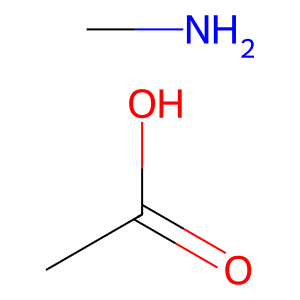

In [12]:
rxn = Chem.ReactionFromSmarts('[*:1].[*:2]>>([*:1].[*:2])')
pr = rxn.RunReactants((molecule1, molecule2))
Chem.SanitizeMol(pr[0][0])
Chem.Draw.MolToImage(pr[0][0])

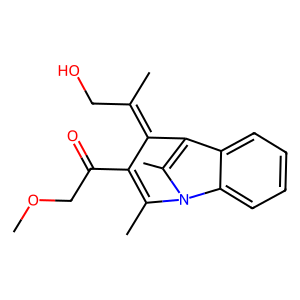

In [7]:
from rdkit.Chem import AllChem as Chem
Chem.Draw.MolToImage(Chem.MolFromSmiles("COCC(=O)C1=C(C)N2C3=CC=CC=C3C(=C2C)C1=C(C)CO"))

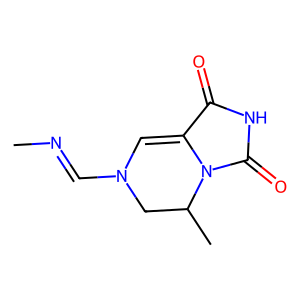

In [2]:
Chem.Draw.MolToImage(Chem.MolFromSmiles(" CN=CN1C=C2C(=O)NC(=O)N2C(C)C1"))

In [6]:
from rdkit import Chem
import numpy as np
from rdkit.Chem import QED, Descriptors, rdMolDescriptors
from rdkit import Chem
from scipy.stats import gaussian_kde
import rdkit
 
 
def cal_mol_props(smi, verbose=False):
    try:
        m = Chem.MolFromSmiles(smi)
        if not m:
            return None, None, None, None, None, None, None, None, None
 
        logp = np.round(Descriptors.MolLogP(m), 2)
        tpsa = np.round(Descriptors.TPSA(m), 1)
        mw = np.round(Descriptors.MolWt(m), 1)
        qed = np.round(QED.qed(m), 2)
        hba = rdMolDescriptors.CalcNumLipinskiHBA(m)
        hbd = rdMolDescriptors.CalcNumLipinskiHBD(m)
        rob = rdMolDescriptors.CalcNumRotatableBonds(m)
        chiral_center = len(Chem.FindMolChiralCenters(m, includeUnassigned=True))
 
        # 计算Bertz CT的数据分布的直方图
        bertz_ct = Descriptors.BertzCT(m)
 
 
        if verbose:
            print(smi)
            print('MW ', mw)
            print('HBD ', hbd)
            print('HBA ', hba)
            print('Logp ', logp)
            print('RotB ', rob)
            print('QED ', qed)
            print('chiral_center ', chiral_center)
            print('TPSA ', tpsa)
            print('bertz_ct', bertz_ct)
 
        return logp, tpsa, mw, qed, hba, hbd, rob, chiral_center, bertz_ct,"分子的SMILES表示为：{}，其各项性质如下：\n\
分子量（MW）：{}\n\
氢键供体数（HBD）：{}\n\
氢键受体数（HBA）：{}\n\
LogP值：{}\n\
可旋转键数（RotB）：{}\n\
QED分数：{}\n\
手性中心数：{}\n\
极性表面积（TPSA）：{}\n\
BertzCT：{}".format(smi, mw, hbd, hba, logp, rob, qed, chiral_center, tpsa, bertz_ct)
 
    except Exception as e:
        print(e)
        return None, None, None, None, None, None, None, None, None, None
 
 
SMILES = 'CCCc1ccc(Cc2sc3c(c2C(=O)NC(C)c2ccc(C(=O)O)cc2)CCOC3)cc1'
logp, tpsa, mw, qed, hba, hbd, rob, chiral_center, bertz_ct, word = cal_mol_props(SMILES, verbose=False)
print(word)

分子的SMILES表示为：CCCc1ccc(Cc2sc3c(c2C(=O)NC(C)c2ccc(C(=O)O)cc2)CCOC3)cc1，其各项性质如下：
分子量（MW）：463.6
氢键供体数（HBD）：2
氢键受体数（HBA）：5
LogP值：5.55
可旋转键数（RotB）：8
QED分数：0.46
手性中心数：1
极性表面积（TPSA）：75.6
BertzCT：1132.1780914913627


In [2]:
from generator import GCPN_simple_molecule_generation, cal_mol_props
import numpy as np
moles = GCPN_simple_molecule_generation(50000)
mole_qed = []
for i in moles:
    mole_qed.append(cal_mol_props(i, verbose=False)[3])
#排序，找到top-1的位置
mole_qed = np.array(mole_qed)
mole_qed = np.argsort(mole_qed)
good_moles = mole_qed[-200:]
good_molecule = []
for i in good_moles:
    good_molecule.append(moles[i])


d:\Anaconda\envs\molecule\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [10]:
# 保存生成的分子
for i in range(len(good_molecule)):
    with open('./assets/good_molecule.txt', 'a') as f:
        f.write(good_molecule[i] + '\n')


In [2]:
from openbabel import pybel

# 读取蛋白质
prot = next(pybel.readfile("pdb", "./assets/2RKA.pdb"))

# 添加氢
prot.OBMol.DeleteHydrogens()
# 写入pdbqt文件
prot.write("pdbqt", "./assets/2RKA.pdbqt", overwrite=True)


In [16]:
from utils import pregenerated_molecule
pregenerated_molecule()

ImportError: cannot import name 'pregenerated_molecule' from 'utils' (d:\pyprojs\MolecularGPT\utils.py)

In [21]:
from openbabel import openbabel, pybel

# SMILES to molecule
smiles_string = "C"  # This is ethanol
obConversion = openbabel.OBConversion()
obConversion.SetInAndOutFormats("smi", "iupac")
mol = pybel.readstring("smi", smiles_string)

# Get IUPAC name
name = obConversion.WriteString(mol.OBMol).strip()

print(name)


In [1]:

from stout import translate_forward, translate_reverse

# SMILES to IUPAC name translation

SMILES = "CN1C=NC2=C1C(=O)N(C(=O)N2C)C"
IUPAC_name = translate_forward(SMILES)
print("IUPAC name of "+SMILES+" is: "+IUPAC_name)

# IUPAC name to SMILES translation

IUPAC_name = "1,3,7-trimethylpurine-2,6-dione"
SMILES = translate_reverse(IUPAC_name)
print("SMILES of "+IUPAC_name+" is: "+SMILES)


ImportError: cannot import name 'translate_forward' from 'stout' (d:\Anaconda\envs\molecule\lib\site-packages\stout\__init__.py)

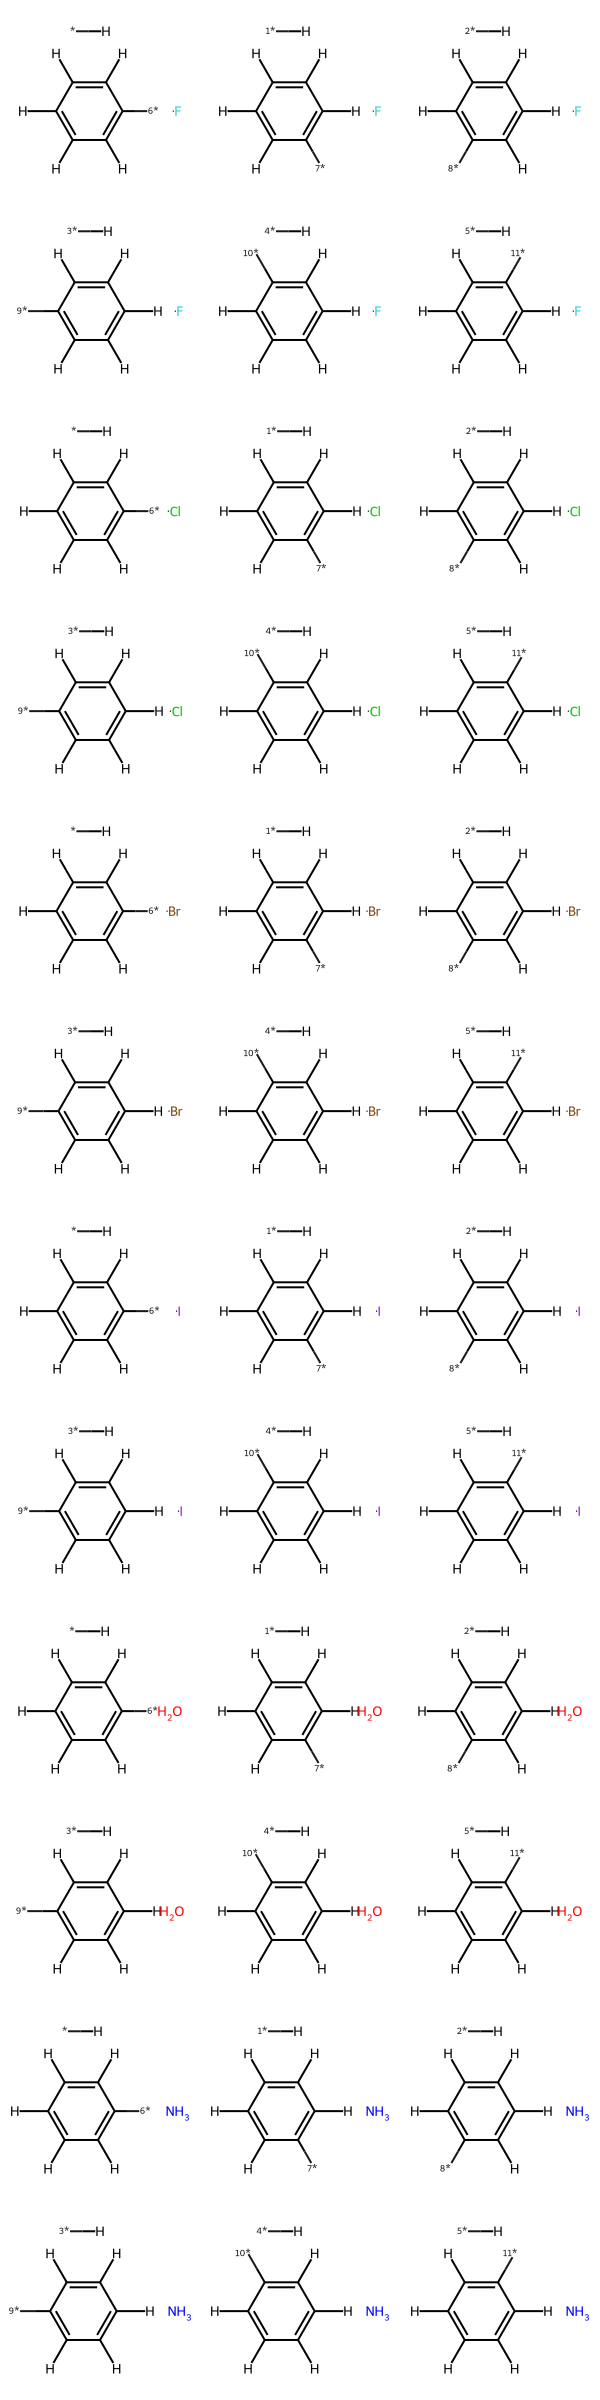

In [10]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import rdchem

# 定义取代基
replacements = ['[F]', '[Cl]', '[Br]', '[I]', 'O', 'N']

# 定义分子骨架
mol = Chem.MolFromSmiles('c1ccccc1')
mol = Chem.AddHs(mol)
# 定义要替换的原子类型（假设我们要替换C-H键）
target_atom = 'H'

# 对于每一个取代基生成一个新的分子
new_mols = []

for replacement in replacements:
    # 对每一个C-H键进行操作
    for bond in mol.GetBonds():
        # 找到C-H键
        if bond.GetBeginAtom().GetSymbol() == target_atom or bond.GetEndAtom().GetSymbol() == target_atom:
            # 得到断开C-H键后的分子
            fragment = Chem.FragmentOnBonds(mol, [bond.GetIdx()])
            # 生成取代基
            replace = Chem.MolFromSmiles(replacement)
            # 重建新的分子
            new_mol = Chem.CombineMols(fragment, replace)
            new_mols.append(new_mol)

# 画出新的分子
Draw.MolsToGridImage(new_mols)


In [15]:
from rdkit import Chem

# 从 SMILES 创建一个分

smiles = Chem.MolToSmiles(Chem.MolFromSmiles('C1=CC=C(CN2CCC3=CC=CC=C3C2)C=C1'))

print('Original SMILES:', smiles)


Original SMILES: c1ccc(CN2CCc3ccccc3C2)cc1


In [18]:
#命令行运行
#obabel -:"O=C(O)OP(=O)(O)O" -O ligand.pdb
import os
import openbabel
SMILES = "c1ccc(NC2(c3ccccc3)CC2)cc1"

0

In [21]:
from openbabel import openbabel, pybel

# 创建一个转化器
obConversion = openbabel.OBConversion()
obConversion.SetInAndOutFormats("smi", "pdb")

# SMILES字符串
smiles_str = 'c1ccc(NC2(c3ccccc3)CC2)cc1'  # 例如，环己烷的SMILES字符串

# 创建一个分子对象
mol = openbabel.OBMol()

# 从SMILES字符串转化到分子对象
obConversion.ReadString(mol, smiles_str)

# 从分子对象转化到PDB字符串
pdb_str = obConversion.WriteString(mol)
#保存
with open('D:/pyprojs/pdbs/ligand.pdb', 'w') as f:
    f.write(pdb_str)


In [30]:
import dash_bio.utils.ngl_parser as ngl_parser
k  = ngl_parser.get_data(data_path='D:/pyprojs/pdbs/', pdb_id='ligand', color='red',reset_view=False, local=True)
k['config']['input']

'COMPND    UNNAMED\nAUTHOR    GENERATED BY OPEN BABEL 3.1.0\nHETATM    1  C   UNL     1       0.000   0.000   0.000  1.00  0.00           C  \nHETATM    2  C   UNL     1       0.000   0.000   0.000  1.00  0.00           C  \nHETATM    3  C   UNL     1       0.000   0.000   0.000  1.00  0.00           C  \nHETATM    4  C   UNL     1       0.000   0.000   0.000  1.00  0.00           C  \nHETATM    5  N   UNL     1       0.000   0.000   0.000  1.00  0.00           N  \nHETATM    6  C   UNL     1       0.000   0.000   0.000  1.00  0.00           C  \nHETATM    7  C   UNL     1       0.000   0.000   0.000  1.00  0.00           C  \nHETATM    8  C   UNL     1       0.000   0.000   0.000  1.00  0.00           C  \nHETATM    9  C   UNL     1       0.000   0.000   0.000  1.00  0.00           C  \nHETATM   10  C   UNL     1       0.000   0.000   0.000  1.00  0.00           C  \nHETATM   11  C   UNL     1       0.000   0.000   0.000  1.00  0.00           C  \nHETATM   12  C   UNL     1       0.00

In [42]:
from openbabel import openbabel, pybel

# 创建一个转化器
obConversion = openbabel.OBConversion()
obConversion.SetInAndOutFormats("smi", "pdb")

# SMILES字符串
smiles_str = 'CCc1ccc(C2CCc3ccccc3N2)cc1'  # 例如，环己烷的SMILES字符串

# 创建一个分子对象
mol = openbabel.OBMol()

# 从SMILES字符串转化到分子对象
obConversion.ReadString(mol, smiles_str)

# 创建一个生成3D坐标的构建器
builder = openbabel.OBBuilder()

# 使用构建器生成3D坐标
builder.Build(mol)

# 从分子对象转化到PDB字符串
pdb_str = obConversion.WriteString(mol)

print(pdb_str)
with open('D:/pyprojs/pdbs/ligand.pdb', 'w') as f:
    f.write(pdb_str)


COMPND    UNNAMED
AUTHOR    GENERATED BY OPEN BABEL 3.1.0
HETATM    1  C   UNL     1       0.905   0.029  -0.013  1.00  0.00           C  
HETATM    2  C   UNL     1       2.425   0.029  -0.013  1.00  0.00           C  
HETATM    3  C   UNL     1       2.932   0.508   1.337  1.00  0.00           C  
HETATM    4  C   UNL     1       3.310  -0.410   2.303  1.00  0.00           C  
HETATM    5  C   UNL     1       3.364   0.124   3.612  1.00  0.00           C  
HETATM    6  C   UNL     1       3.419   1.413   3.893  1.00  0.00           C  
HETATM    7  C   UNL     1       3.815   1.916   5.272  1.00  0.00           C  
HETATM    8  C   UNL     1       3.785   3.436   5.285  1.00  0.00           C  
HETATM    9  C   UNL     1       4.181   3.938   6.664  1.00  0.00           C  
HETATM   10  C   UNL     1       4.152   5.458   6.677  1.00  0.00           C  
HETATM   11  C   UNL     1       3.766   6.111   5.518  1.00  0.00           C  
HETATM   12  C   UNL     1       3.939   7.515   5.

In [6]:
#获取一些知识
import json
knowledge='''靶点：在生物医学和药物研发中，靶点通常是指在治疗过程中，药物作用的特定分子或细胞。靶点可以是细胞表面的受体，或是细胞内的酶等各种生物分子，通过与药物相互作用，可以改变细胞的生理状态，从而达到治疗疾病的目的。
靶点配对：这是药物研发流程中的一个重要步骤，目的是找到并确认药物可以有效作用的生物靶点。通常，这个过程涉及到大量的生物实验和数据分析，如基因表达分析、蛋白质结构研究等，以确定某种分子或蛋白质是否可以作为治疗某种疾病的有效靶点。
分子设计：在药物研发中，分子设计是指通过结构生物学、化学和计算生物学等多种方法，设计和优化具有特定生物活性的分子。这个过程通常包括两个步骤：一是基于已知靶点结构和功能，设计新的药物分子；二是通过实验和计算方法优化这些药物分子，使其更好地与靶点结合，从而提高药物的效果和减少副作用。
分子合成：分子合成是指在实验室中通过化学反应，制造特定的分子结构。在药物研发过程中，经过分子设计步骤后，科学家们需要在实验室中制造出这些设计出来的分子，这个过程就是分子合成。分子合成的方法和步骤可能会因为目标分子的结构复杂度和功能需求而有所不同。
临床试验：临床试验是指在研究和开发新药或新疗法时，进行的人体试验。这是药物研发过程中非常重要的一步，目的是测试新药或新疗法在人体中的安全性和有效性。临床试验通常分为几个阶段，每个阶段都有严格的设计和执行标准，以确保结果的准确性和患者的安全。
靶点口袋：在生物医学和药物研发中，靶点口袋通常指的是生物分子（如蛋白质）上，可以与药物或其它分子特定结合的区域。这个区域的形状和化学性质决定了其与哪种分子能结合，以及结合的强度。药物设计时，科学家们通常会根据靶点口袋的特性，设计出能够准确“契合”这个口袋的药物分子，从而达到调控生物分子功能，治疗疾病的效果。
'''
knowledges = knowledge.split('\n')
know_json = {}
for i in range(len(knowledges)-1):
    temp = knowledges[i].split('：')
    print(temp)
    know_json[temp[0]] = temp[1]
json.dump(know_json,open('./assets/knowledge.json','w'))

['靶点', '在生物医学和药物研发中，靶点通常是指在治疗过程中，药物作用的特定分子或细胞。靶点可以是细胞表面的受体，或是细胞内的酶等各种生物分子，通过与药物相互作用，可以改变细胞的生理状态，从而达到治疗疾病的目的。']
['靶点配对', '这是药物研发流程中的一个重要步骤，目的是找到并确认药物可以有效作用的生物靶点。通常，这个过程涉及到大量的生物实验和数据分析，如基因表达分析、蛋白质结构研究等，以确定某种分子或蛋白质是否可以作为治疗某种疾病的有效靶点。']
['分子设计', '在药物研发中，分子设计是指通过结构生物学、化学和计算生物学等多种方法，设计和优化具有特定生物活性的分子。这个过程通常包括两个步骤', '一是基于已知靶点结构和功能，设计新的药物分子；二是通过实验和计算方法优化这些药物分子，使其更好地与靶点结合，从而提高药物的效果和减少副作用。']
['分子合成', '分子合成是指在实验室中通过化学反应，制造特定的分子结构。在药物研发过程中，经过分子设计步骤后，科学家们需要在实验室中制造出这些设计出来的分子，这个过程就是分子合成。分子合成的方法和步骤可能会因为目标分子的结构复杂度和功能需求而有所不同。']
['临床试验', '临床试验是指在研究和开发新药或新疗法时，进行的人体试验。这是药物研发过程中非常重要的一步，目的是测试新药或新疗法在人体中的安全性和有效性。临床试验通常分为几个阶段，每个阶段都有严格的设计和执行标准，以确保结果的准确性和患者的安全。']
['靶点口袋', '在生物医学和药物研发中，靶点口袋通常指的是生物分子（如蛋白质）上，可以与药物或其它分子特定结合的区域。这个区域的形状和化学性质决定了其与哪种分子能结合，以及结合的强度。药物设计时，科学家们通常会根据靶点口袋的特性，设计出能够准确“契合”这个口袋的药物分子，从而达到调控生物分子功能，治疗疾病的效果。']


NameError: name 'json' is not defined